# Samsung Capstone EDA

Needed Imports

In [35]:
!pip install category_encoders

import pandas as pd
import os
pd.set_option('display.max_columns', None)
import torch
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Ploting
import matplotlib.pyplot as plt
import seaborn as sns

# Encoders
from category_encoders import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Supervised Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.svm import SVC

# Unsupervised Learning
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering

# Training Types and Metrics
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import classification_report, f1_score, fbeta_score, make_scorer, ConfusionMatrixDisplay

#Ensemble
from sklearn.ensemble import RandomForestClassifier

## Fake News Classification

In [36]:
# Load datataset Fake News Classification
## Repo Link
#news_article=pd.read_csv('https://raw.githubusercontent.com/JaimeFerreira2002/Truthify/refs/heads/main/Datasets/news_articles.csv')
## Locally/Codespaces
news_article=pd.read_csv(os.path.join('Datasets','news_articles.csv'))

news_article.head(5)
news_article.info()
print("Null values:")
news_article.isnull().sum()
# drop all object type (strings), and check for any negative value
print("Negative values:")
(news_article.select_dtypes(exclude=['object']) < 0).sum()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author                   2096 non-null   object 
 1   published                2096 non-null   object 
 2   title                    2096 non-null   object 
 3   text                     2050 non-null   object 
 4   language                 2095 non-null   object 
 5   site_url                 2095 non-null   object 
 6   main_img_url             2095 non-null   object 
 7   type                     2095 non-null   object 
 8   label                    2095 non-null   object 
 9   title_without_stopwords  2094 non-null   object 
 10  text_without_stopwords   2046 non-null   object 
 11  hasImage                 2095 non-null   float64
dtypes: float64(1), object(11)
memory usage: 196.6+ KB
Null values:


author                      0
published                   0
title                       0
text                       46
language                    1
site_url                    1
main_img_url                1
type                        1
label                       1
title_without_stopwords     2
text_without_stopwords     50
hasImage                    1
dtype: int64

Negative values:


hasImage    0
dtype: int64

## Politifact Fact Check

In [37]:
# Load datataset Politifact Fact Check Dataset
## Repo Link
#politifact=pd.read_csv('https://raw.githubusercontent.com/JaimeFerreira2002/Truthify/refs/heads/main/Datasets/politifact_factcheck_data.json')
## Locally/Codespaces
politifact=pd.read_json(os.path.join('Datasets','politifact_factcheck_data.json'), lines=True)

politifact.head(5)
politifact.info()
print("Null values:")
politifact.isnull().sum()
# drop all object type (strings), and check for any negative value
print("Negative values:")
(politifact.select_dtypes(exclude=['object']) < 0).sum()

,verdict,statement_originator,statement,statement_date,statement_source,factchecker,factcheck_date,factcheck_analysis_link
0,true,Barack Obama,John McCain opposed bankruptcy protections for...,6/11/2008,speech,Adriel Bettelheim,6/16/2008,https://www.politifact.com/factchecks/2008/jun...
1,false,Matt Gaetz,"""Bennie Thompson actively cheer-led riots in t...",6/7/2022,television,Yacob Reyes,6/13/2022,https://www.politifact.com/factchecks/2022/jun...
2,mostly-true,Kelly Ayotte,"Says Maggie Hassan was ""out of state on 30 day...",5/18/2016,news,Clay Wirestone,5/27/2016,https://www.politifact.com/factchecks/2016/may...
3,false,Bloggers,"""BUSTED: CDC Inflated COVID Numbers, Accused o...",2/1/2021,blog,Madison Czopek,2/5/2021,https://www.politifact.com/factchecks/2021/feb...
4,half-true,Bobby Jindal,"""I'm the only (Republican) candidate that has ...",8/30/2015,television,Linda Qiu,8/30/2015,https://www.politifact.com/factchecks/2015/aug...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21152 entries, 0 to 21151
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   verdict                  21152 non-null  object
 1   statement_originator     21152 non-null  object
 2   statement                21152 non-null  object
 3   statement_date           21152 non-null  object
 4   statement_source         21152 non-null  object
 5   factchecker              21152 non-null  object
 6   factcheck_date           21152 non-null  object
 7   factcheck_analysis_link  21152 non-null  object
dtypes: object(8)
memory usage: 1.3+ MB
Null values:


verdict                    0
statement_originator       0
statement                  0
statement_date             0
statement_source           0
factchecker                0
factcheck_date             0
factcheck_analysis_link    0
dtype: int64

Negative values:


Series([], dtype: float64)

<Figure size 1000x400 with 0 Axes>

/tmp/ipykernel_486089/558601558.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='verdict', data=politifact, palette='pastel')


<Axes: xlabel='verdict', ylabel='count'>

Text(0.5, 1.0, 'Distribution of Real/Fake')

Text(0.5, 0, 'Number of news that are Real and Fake')

Text(0, 0.5, 'Count')

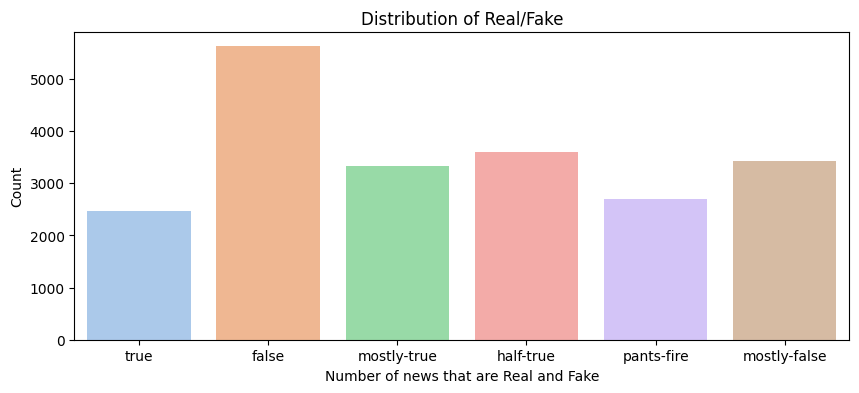

<Figure size 2000x1000 with 0 Axes>

/tmp/ipykernel_486089/558601558.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='statement_source', data=politifact, palette='pastel')


<Axes: xlabel='statement_source', ylabel='count'>

Text(0.5, 1.0, 'Distribution of Statement Source')

Text(0.5, 0, 'Statement Source Type')

Text(0, 0.5, 'Count')

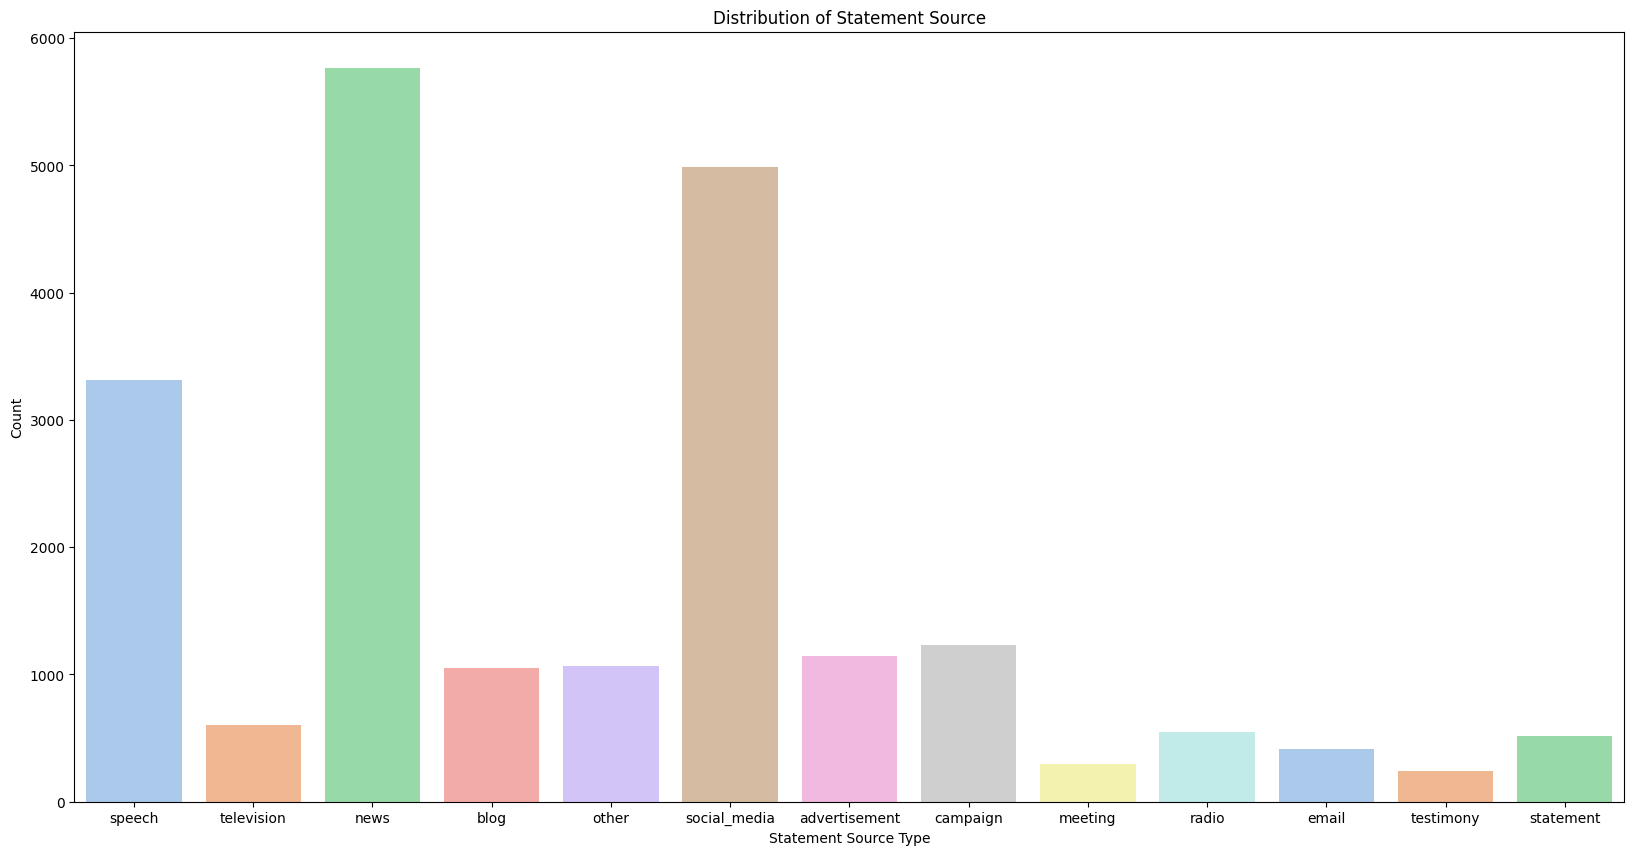

In [40]:
plt.figure(figsize=(10, 4))
sns.countplot(x='verdict', data=politifact, palette='pastel')
plt.title("Distribution of Real/Fake")
plt.xlabel("Number of news that are Real and Fake")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(20, 10))
sns.countplot(x='statement_source', data=politifact, palette='pastel')
plt.title("Distribution of Statement Source")
plt.xlabel("Statement Source Type")
plt.ylabel("Count")
plt.show()

## Snopes Fact-news Data

In [39]:
# Load datataset Snopes Fact-news Data
## Repo Link
#snopes=pd.read_csv('https://raw.githubusercontent.com/JaimeFerreira2002/Truthify/refs/heads/main/Datasets/snopeswithsum.csv')
## Locally/Codespaces
snopes=pd.read_csv(os.path.join('Datasets','snopeswithsum.csv'))

snopes.head(5)
snopes.info()
print("Null values:")
snopes.isnull().sum()
# drop all object type (strings), and check for any negative value
print("Negative values:")
(snopes.select_dtypes(exclude=['object']) < 0).sum()

,question,comment,claim,rate,what's true,what's false,what's unknown,origin,summary
0,Did Kamala Harris Support Abortion Until the T...,The Democratic vice-presidential candidate's p...,"U.S. Sen. Kamala Harris, D-Calif., supports th...",Mixture,"U.S. Sen. Kamala Harris, D-Calif, has maintain...",She has not explicitly stated that she support...,NaN,Debates surrounding abortion frequently resurf...,"U.S. Sen. Kamala Harris, D-Calif., has been to..."
1,Did Hitler Invent the Inflatable Sex Doll?,Nothing attracts curiosity like a lurid combin...,Adolf Hitler was behind the invention of the f...,False,NaN,NaN,NaN,"In late July 2020, readers shared a 2016 blog ...",Readers shared a 2016 blog post with the headl...
2,Does Texting ‘RBG’ to 50409 Send a Letter to Y...,The automated political advocacy service Resis...,"Texting ""RBG"" to 50409 engages a service calle...",True,NaN,NaN,NaN,"In September 2020, following the death of U.S....",Readers asked Snopes to examine the accuracy a...
3,Pride Parade Fire Hydrant Mishap,An image depicts a man stabbed at an altercati...,An image depicts an overenthusiastic Pride att...,Miscaptioned,NaN,NaN,NaN,Yearly Pride festivities were marked on 26 Jun...,A Twitter user tweeted a photograph of a blood...
4,Swedish Police Hand Out ‘Don’t Touch Me’ Brace...,Police in Sweden have introduced sexual assaul...,Swedish police have introduced anti-sexual ass...,Mixture,Police in Sweden are distributing colored brac...,Swedish police did not create or distribute th...,NaN,"On 30 June 2016, the Federalist Papers web sit...",Police in Sweden have come up with a sure-fire...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4550 entries, 0 to 4549
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question        4550 non-null   object
 1   comment         4550 non-null   object
 2   claim           4550 non-null   object
 3   rate            4550 non-null   object
 4   what's true     765 non-null    object
 5   what's false    719 non-null    object
 6   what's unknown  121 non-null    object
 7   origin          4550 non-null   object
 8   summary         4550 non-null   object
dtypes: object(9)
memory usage: 320.1+ KB
Null values:


question             0
comment              0
claim                0
rate                 0
what's true       3785
what's false      3831
what's unknown    4429
origin               0
summary              0
dtype: int64

Negative values:


Series([], dtype: float64)